In [5]:

import matplotlib.pyplot as plt
import os
import rasterio 
import numpy as np

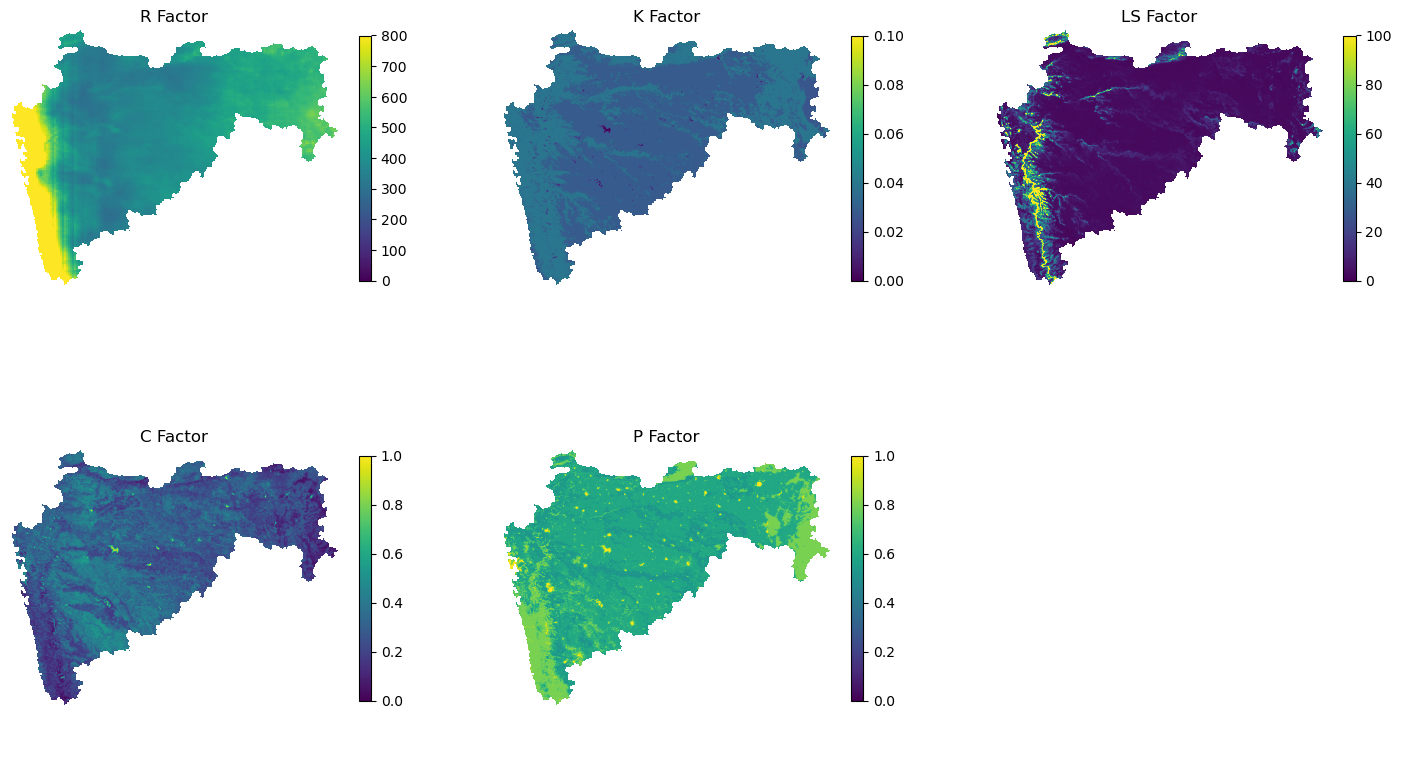

In [6]:

# List of file paths (replace with your actual file paths or folder)
tif_files = {
    'R Factor': 'R_factor.tif',
    'K Factor': 'K_factor.tif',
    'LS Factor': 'LS_factor.tif',
    'C Factor': 'C_factor.tif',
    'P Factor': 'P_factor.tif',
    #'Soil Loss': 'Soil_Loss.tif',
    #'Soil Loss Class': 'Soil_Loss_Class.tif'  # Optional
}

colorbar_limits = {
    'R Factor': (0, 800),        # example: rainfall erosivity units
    'K Factor': (0, 0.1),          # soil erodibility
    'LS Factor': (0, 100),        # slope length/steepness
    'C Factor': (0, 1),          # cover management factor
    'P Factor': (0, 1)           # support practice factor
}

# Plot all factors
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.ravel()

for i, (title, path) in enumerate(tif_files.items()):
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue

    with rasterio.open(path) as src:
        data = src.read(1, masked=True)
        vmin, vmax = colorbar_limits.get(title, (None, None))  # fallback to auto-scaling
        img = axs[i].imshow(data, cmap='viridis', vmin=vmin, vmax=vmax)
        # img = axs[i].imshow(data, cmap='viridis')
        axs[i].set_title(title)
        axs[i].axis('off')
        fig.colorbar(img, ax=axs[i], shrink=0.7)

axs[-1].axis('off')
# plt.tight_layout()
# plt.savefig("Parameters.png",dpi=300)
plt.show()


In [8]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import matplotlib.colors as mcolors

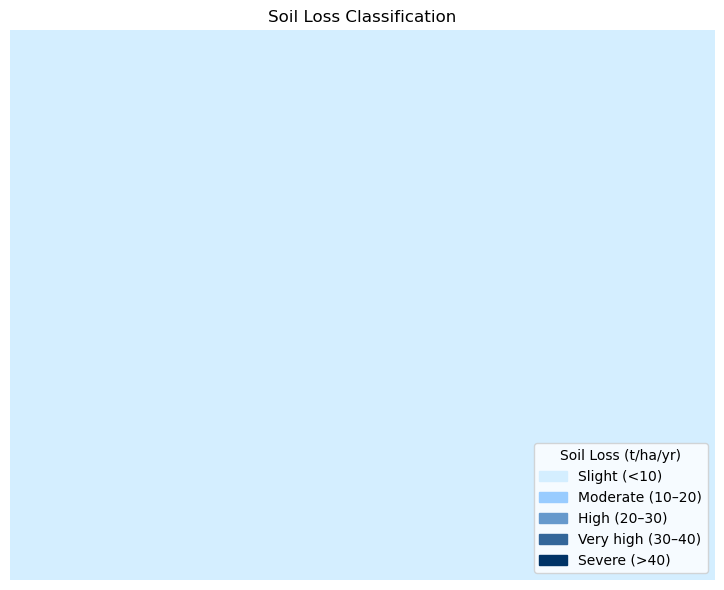

In [9]:

# Define the file path
soil_loss_file = "Soil_Loss.tif"

# Classification bins and labels
bins = [0, 10, 20, 30, 40,1000]
labels = ["Slight (<10)", "Moderate (10–20)", "High (20–30)", "Very high (30–40)", "Severe (>40)"]
colors = ["#d4eeff", "#99ccff", "#6699cc", "#336699", "#003366"]  # Light to dark blue

# Create a colormap and normalization for discrete classes
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bins, cmap.N)

# Read and classify the raster data
with rasterio.open(soil_loss_file) as src:
    data = src.read(1, masked=True)
    classified = np.digitize(data, bins) - 1  # Subtract 1 to get 0-based index

# Mask invalid data
classified = np.ma.masked_where(data.mask, classified)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(classified,cmap=cmap,norm=norm )#cmap=cmap, norm=norm
ax.set_title("Soil Loss Classification")
ax.axis('off')

# Create a legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(handles, labels, loc='lower right', title="Soil Loss (t/ha/yr)")

plt.tight_layout()
plt.show()

In [10]:
# Define the file path
soil_loss_file = "Soil_Loss.tif"

# Classification bins and labels
bins = [0, 10, 20, 30, 40, 100000000]
labels = ["Slight (<10)", "Moderate (10–20)", "High (20–30)", "Very high (30–40)", "Severe (>40)"]
colors = ["#d4eeff", "#99ccff", "#6699cc", "#336699", "#003366"]

# Create colormap and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bins, cmap.N)

# Read raster
with rasterio.open(soil_loss_file) as src:
    data = src.read(1, masked=True)  # This will create a masked array for NaNs

# Apply classification only on valid data
classified = np.full(data.shape, -1)  # Fill with dummy value (-1) for NaNs
classified[~data.mask] = np.digitize(data[~data.mask], bins) - 1  # classify and shift to 0-based index
classified = np.ma.masked_where(classified == -1, classified)  # mask out dummy values


# Mask back the NaNs for clean plotting
# classified = np.ma.masked_invalid(classified)



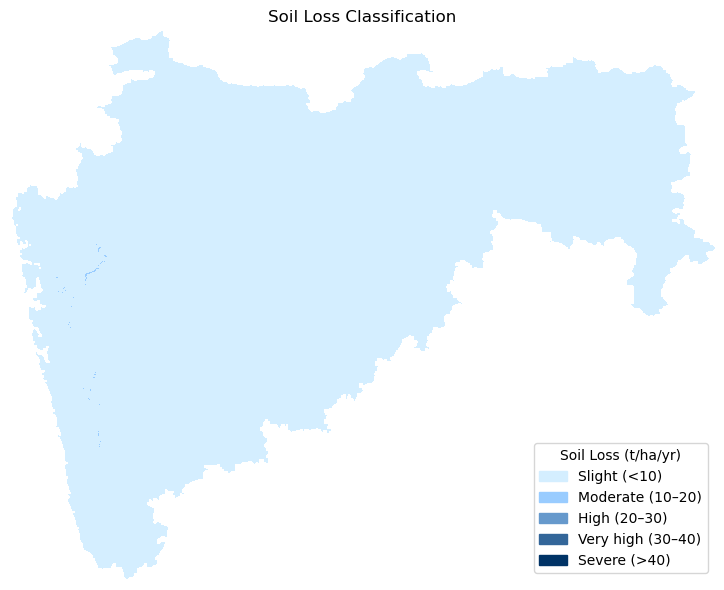

In [11]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(data, cmap=cmap,)
ax.set_title("Soil Loss Classification")
ax.axis('off')

# Legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(handles, labels, loc='lower right', title="Soil Loss (t/ha/yr)")

plt.tight_layout()
plt.show()

c:\Users\manis\anaconda3\Lib\site-packages\matplotlib\image.py:463: RuntimeWarning: invalid value encountered in scalar subtract
  newmin = vmid - dv * fact


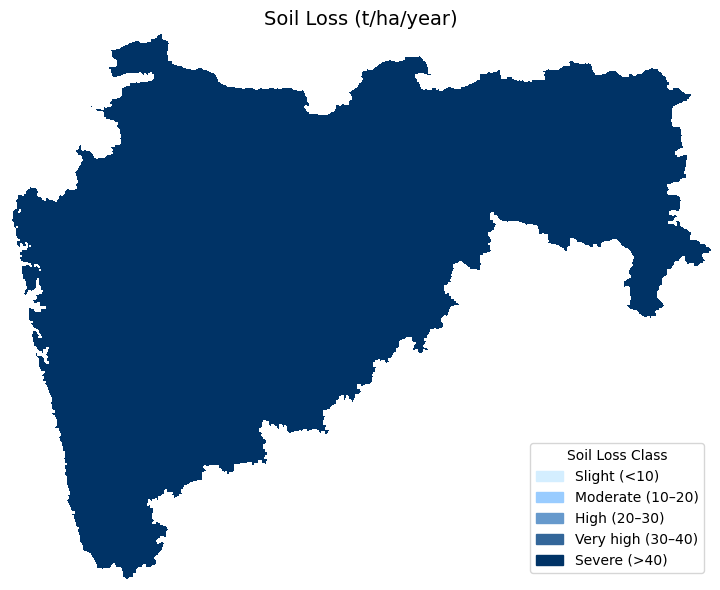

In [28]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import matplotlib.colors as mcolors

# Load the soil loss raster
soil_loss_file = "Soil_Loss.tif"

# Define bin edges and corresponding colors
bounds = [0, 10, 20, 30, 40, np.inf]
colors = ["#d4eeff", "#99ccff", "#6699cc", "#336699", "#003366"]
labels = ["Slight (<10)", "Moderate (10–20)", "High (20–30)", "Very high (30–40)", "Severe (>40)"]

# Create colormap and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bounds, len(colors))

# Read the raster
with rasterio.open(soil_loss_file) as src:
    data = src.read(1, masked=True)  # MaskedArray, handles NaNs/masked cells

# Plot the data with defined color bins
fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(data, cmap=cmap,norm=norm)
ax.set_title("Soil Loss (t/ha/year)", fontsize=14)
ax.axis("off")

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(handles, labels, loc="lower right", title="Soil Loss Class", fontsize=10)

plt.tight_layout()
plt.show()


In [9]:
import xarray as xr
import geopandas as gpd

c:\Users\manis\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


<Axes: >

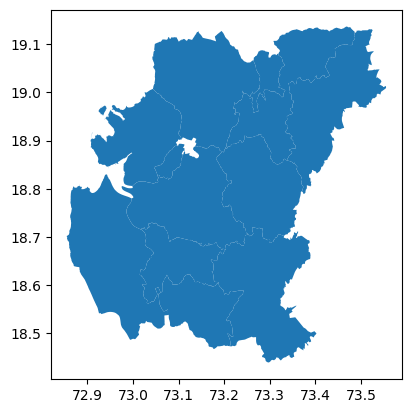

In [10]:
mat = gpd.read_file("RANGE_BOUNDARY/RANGE BOUNDARY/Range_Boundary-Alibag_Division.shp")
mat =mat.to_crs(epsg=4326)
mat.plot()

In [ ]:
df = gpd.read_file("g:\LAB_LINUX\Download\Maharashtra\Maharshtra_shape.shp")
df2 = gpd.read_file("Shapefiles\IND_adm3.shp")
df2 = df2[df2["NAME_1"]=="Maharashtra"]


<Axes: >

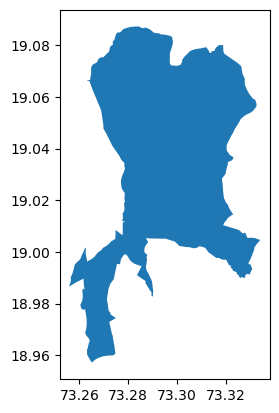

In [11]:
# Filter for Matheran Plateau (replace 'NAME' and 'Matheran' with actual column/value)
matheran = mat[mat['MFRNG_NAME'].str.contains('Matheran', case=False)]
matheran.plot()

In [12]:
import rasterio
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Read raster using rasterio
tif_file = "Soil_Loss.tif"
with rasterio.open(tif_file) as src:
    soil_loss = src.read(1, masked=True)
    transform = src.transform
    crs = src.crs
    width = src.width
    height = src.height

    # Generate coordinates
    lon = np.arange(width) * transform.a + transform.c + transform.a / 2
    lat = np.arange(height) * transform.e + transform.f + transform.e / 2

# Step 2: Create xarray Dataset
ds = xr.Dataset(
    {"soil_loss": (["lat", "lon"], soil_loss)},
    coords={"lat": lat[::-1], "lon": lon},
)
ds["soil_loss"].attrs["units"] = "tons/ha/year"
ds.attrs["crs"] = str(crs)

# Step 3: Save as NetCDF
ds.to_netcdf("Soil_Loss.nc")
print("✅ NetCDF saved as Soil_Loss.nc")

# Step 4: Classify soil loss values into 5 classes
bins = [0, 10, 20, 30, 40, np.inf]
labels = [1, 2, 3, 4, 5]
class_names = ["Slight (<10)", "Moderate (10–20)", "High (20–30)", "Very high (30–40)", "Severe (>40)"]
colors = ['#490eff', '#12f4ff', '#12ff50', '#e5ff12', '#ff4812']

# Classify, while ignoring NaNs
soil_loss_vals = ds["soil_loss"].values
classified = np.digitize(soil_loss_vals, bins, right=False)
classified[np.isnan(soil_loss_vals)] = 0  # Use 0 as nodata

# Step 5: Plot classified map
cmap = mcolors.ListedColormap(colors)
bounds = [1, 2, 3, 4, 5, 6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

masked_classified = np.ma.masked_where(classified == 0, classified)

# plt.figure(figsize=(10, 6))
# plt.imshow(masked_classified, cmap=cmap, norm=norm, extent=[ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()])
# df2.boundary.plot(color='black', linewidth=0.8)
# plt.title("Classified Soil Loss")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")

# # Add legend
# handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
# plt.legend(handles, class_names, title="Soil Loss Class", loc="lower right")

# plt.tight_layout()
# plt.show()


✅ NetCDF saved as Soil_Loss.nc


NameError: name 'df2' is not defined

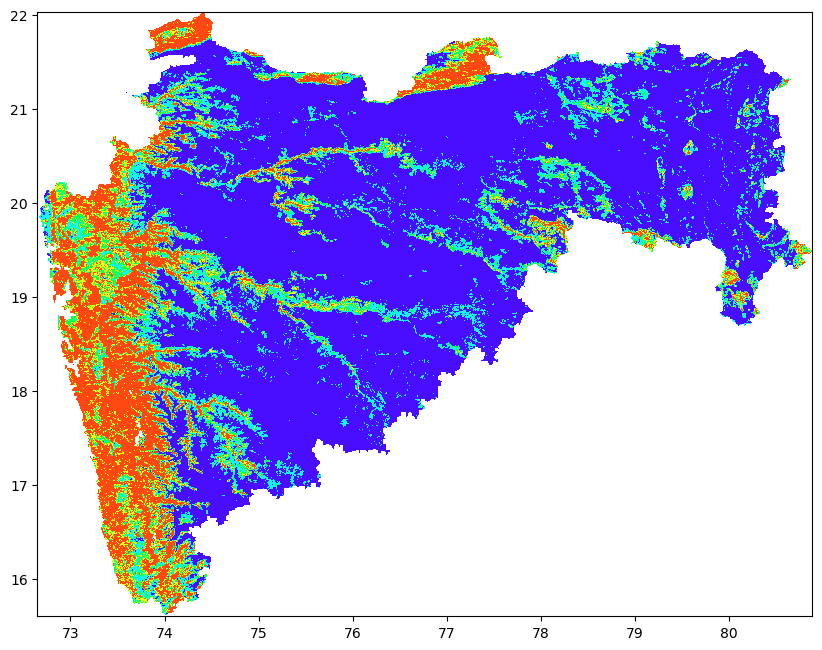

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot classified soil loss
img = ax.imshow(masked_classified, cmap=cmap, extent=[
    ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()
],)

# Load and plot the shapefile

df2.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Title and colorbar
ax.set_title("Classified Soil Loss", fontsize=14)
# Add legend
handles = [plt.Rectangle((1, 1), 1.5, 1.5, color=color) for color in colors]
plt.legend(handles, class_names, title="Soil Loss Class", loc="lower right")

lon_min, lon_max = 72.85, 74
lat_min, lat_max = 18.4, 19.15

# Apply zoom using xlim and ylim
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
# plt.xlim(lon_min, lon_max)
# plt.ylim(lat_min, lat_max)


plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.tight_layout()
# plt.savefig("Classified_soil_loss_Matheran.png",dpi=300)
plt.show()


In [ ]:
df = gpd.read_file("g:\LAB_LINUX\Download\Maharashtra\Maharshtra_shape.shp")
df2 = gpd.read_file("Shapefiles\IND_adm3.shp")

In [ ]:
df2["NAME_1"].unique()

In [ ]:
df2 = df2[df2["NAME_1"]=="Maharashtra"]

In [ ]:
df2

In [ ]:
# df.boundary.plot(color='black', linewidth=0.8)
df2.boundary.plot(color='black', linewidth=0.8)

#Site suitability

In [ ]:
import rasterio
import geopandas as gpd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.enums import Resampling
from rasterio.mask import mask
import os

In [ ]:


# # --- Step 1: Load Input Rasters (Assumed preprocessed and aligned) ---
# # Define file paths
# raster_paths = {
#     "r_factor": "r_factor.tif",
#     "slope": "slope.tif",
#     "lulc": "lulc.tif",
#     "soil": "soil_type.tif",
#     "proximity": "proximity_to_lake.tif"
# }

# # Define weights for weighted overlay
# weights = {
#     "r_factor": 0.3,
#     "slope": 0.25,
#     "lulc": 0.2,
#     "soil": 0.15,
#     "proximity": 0.1
# }

# # Scoring functions (example classification, update as needed)
# def classify_r_factor(data):
#     return np.digitize(data, bins=[100, 200, 300, 400, 500])  # 1-5 scale

# def classify_slope(data):
#     return np.digitize(data, bins=[5, 10, 20, 30, 50])

# def classify_lulc(data):
#     return np.digitize(data, bins=[2, 4, 6, 8, 10])  # Adjust as per LULC codes

# def classify_soil(data):
#     return np.digitize(data, bins=[1, 2, 3, 4, 5])  # Example mapping

# def classify_proximity(data):
#     return np.digitize(data, bins=[100, 200, 500, 1000, 1500])  # Distance from lake

# classifiers = {
#     "r_factor": classify_r_factor,
#     "slope": classify_slope,
#     "lulc": classify_lulc,
#     "soil": classify_soil,
#     "proximity": classify_proximity
# }

# # --- Step 2: Apply Classifications and Weighted Overlay ---
# weighted_sum = None
# meta = None

# for key, path in raster_paths.items():
#     with rasterio.open(path) as src:
#         data = src.read(1, masked=True)
#         if meta is None:
#             meta = src.meta.copy()
#         classified = classifiers[key](data)
#         weighted = classified * weights[key]
#         if weighted_sum is None:
#             weighted_sum = weighted
#         else:
#             weighted_sum += weighted

# # --- Step 3: Save Suitability Raster ---
# output_path = "suitability_map.tif"
# meta.update(dtype=rasterio.float32, count=1)

# with rasterio.open(output_path, "w", **meta) as dst:
#     dst.write(weighted_sum.astype(rasterio.float32), 1)

# # --- Step 4: Plot Suitability Map ---
# plt.figure(figsize=(10, 8))
# plt.imshow(weighted_sum, cmap='YlGn', vmin=1, vmax=5)
# plt.title("Site Suitability for Soil and Water Conservation")
# plt.colorbar(label="Suitability Score")
# plt.axis("off")
# plt.show()


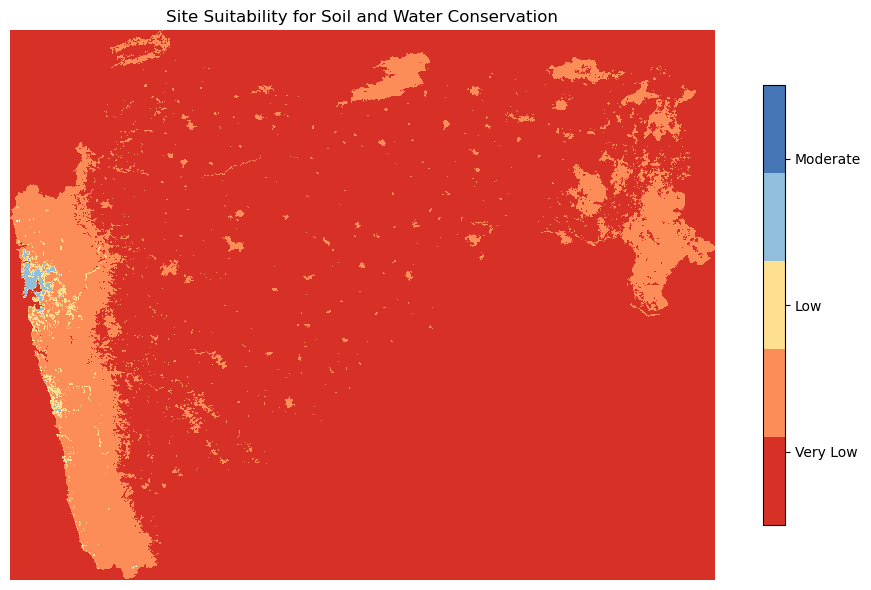

In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os
from rasterio.plot import show
from rasterio.enums import Resampling
from matplotlib.colors import ListedColormap

# --- Input files
input_files = {
    'Soil Loss': 'Soil_Loss.tif',
    'R Factor': 'R_factor.tif',
    'K Factor': 'K_factor.tif',
    'LS Factor': 'LS_factor.tif',
    'C Factor': 'C_factor.tif',
    'P Factor': 'P_factor.tif'
}

# --- Expert-assigned weights (you can change as needed)
weights = {
    'Soil Loss': 0.25,
    'R Factor': 0.25,
    'K Factor': 0.1,
    'LS Factor': 0.15,
    'C Factor': 0.15,
    'P Factor': 0.1
}

# --- Read and normalize each layer
normalized_layers = {}
profile = None

for name, path in input_files.items():
    with rasterio.open(path) as src:
        data = src.read(1, masked=True)
        profile = src.profile if profile is None else profile
        # Min-max normalization (skip NaNs)
        data_min, data_max = np.nanmin(data), np.nanmax(data)
        norm = (data - data_min) / (data_max - data_min)
        normalized_layers[name] = norm

# --- Weighted overlay to calculate suitability index
suitability = np.zeros_like(next(iter(normalized_layers.values())))
for name, layer in normalized_layers.items():
    suitability += weights[name] * layer

# --- Classify into 5 suitability classes (reversed: 0=Low, 4=High suitability)
classes = np.digitize(suitability, np.linspace(0, 1, 6)) - 1  # values 0–4

# --- Define custom colormap (5 classes)
cmap = ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'])
class_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# --- Plot
plt.figure(figsize=(10, 6))
im = plt.imshow(classes, cmap=cmap)
cbar = plt.colorbar(im, ticks=np.arange(0.5, 5.5), shrink=0.8)
cbar.ax.set_yticklabels(class_labels)
plt.title("Site Suitability for Soil and Water Conservation")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
ds2 = xr.Dataset(
    {"classes": (["lat", "lon"], classes)},
    coords={"lat": lat[::-1], "lon": lon},
)
#ds2["soil_loss"].attrs["units"] = "tons/ha/year"
ds2.attrs["crs"] = str(crs)

# Step 3: Save as NetCDF
ds2.to_netcdf("Site_suitability_classes_2.nc")

In [ ]:
plt.imshow(suitability,cmap=cmap)
plt.colorbar()

In [ ]:
# Create mask
from rasterio.features import geometry_mask
shapes = [geom for geom in mat.geometry]
mask = geometry_mask(
    geometries=shapes,
    out_shape=(len(ds2.lat), len(ds2.lon)),
    transform=transform,
    invert=True  # Keep only what's inside the shapefile
)

# Apply the mask
masked_data = np.where(mask, ds2.values, np.nan)

In [3]:
import geopandas as gpd
import xarray as xr
import rioxarray
from rasterio import features
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

ModuleNotFoundError: No module named 'rioxarray'

In [ ]:
suitability.da

In [ ]:
# Classify, while ignoring NaNs
su = ds2["classes"].values
bins =  np.linspace(0, 1, 6)
classified = np.digitize(su, bins, right=False)
classified[np.isnan(su)] = 0  # Use 0 as nodata

# Step 5: Plot classified map
cmap = mcolors.ListedColormap(colors)
bounds = [1, 2, 3, 4, 5, 6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

masked_classified = np.ma.masked_where(classified == 0, classified)

In [26]:


# Load your shapefile (assumed already in lat/lon, EPSG:4326)
mat = gpd.read_file("RANGE_BOUNDARY/RANGE BOUNDARY/Range_Boundary-Alibag_Division.shp")
mat = mat.to_crs("EPSG:4326")  # Ensure CRS matches raster

# Open your classified soil loss NetCDF using rioxarray
ds = xr.open_dataset("Site_suitability_classes_2.nc")
ds2 = ds["classes"]  # Assuming 'classes' is the variable name

# Attach spatial reference to ds2
ds2.rio.write_crs("EPSG:4326", inplace=True)

# Mask the raster using shapefile geometry
geoms = [mapping(geom) for geom in mat.geometry]
ds2_masked = ds2.rio.clip(geoms, mat.crs, drop=False, invert=False)

# Plotting
colors = ['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4']
class_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(10, 8))
img = ds2_masked.plot.imshow(
    ax=ax,
    cmap=cmap,
    add_colorbar=False,
    extent=[float(ds2.lon.min()), float(ds2.lon.max()), float(ds2.lat.min()), float(ds2.lat.max())],
)

# Plot shapefile
mat.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Add legend
patches = [mpatches.Patch(color=colors[i], label=class_labels[i]) for i in range(len(colors))]
ax.legend(handles=patches, title="Suitability", loc="lower right")

# Zoom in
plt.xlim(72.85, 73.6)
plt.ylim(18.4, 19.15)

plt.title("Site Suitability (Masked by Watershed)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.savefig("masked_site_suitability.png", dpi=300, bbox_inches='tight')
plt.show()



ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [ ]:
ds2.classes.plot()

NameError: name 'ds2' is not defined

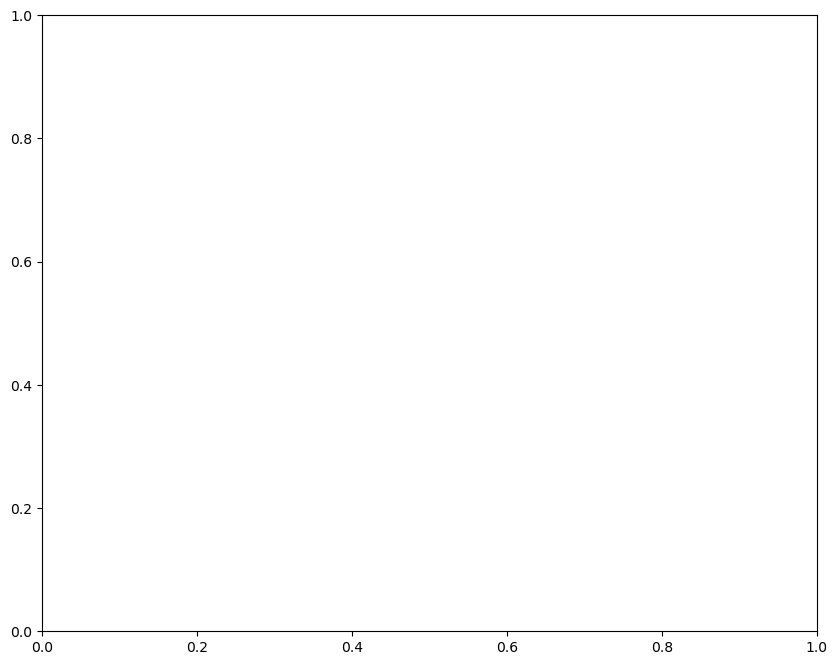

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

cmap = ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'])
class_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
colors =['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4']
# Plot classified soil loss
img = ax.imshow(ds2.classes, cmap=cmap, extent=[
    ds2.lon.min(), ds2.lon.max(), ds2.lat.min(), ds2.lat.max()
],)

# Load and plot the shapefile

mat.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Title and colorbar
ax.set_title("Site Suitability for Soil and Water Conservation", fontsize=14)
# Add legend
# handles = [plt.Rectangle((1, 1), 1.5, 1.5, color=color) for color in colors]
# plt.legend(handles, class_labels, title="", loc="lower right")
patches = [mpatches.Patch(color=colors[i], label=class_labels[i]) for i in range(len(colors))]
ax.legend(handles=patches, title="Suitability", loc="lower right")


lon_min, lon_max = 72.85, 73.6
lat_min, lat_max = 18.4, 19.15

# Apply zoom using xlim and ylim
# ax.set_xlim(lon_min, lon_max)
# ax.set_ylim(lat_min, lat_max)
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.tight_layout()
# plt.savefig("Site_suitability2.png",dpi=300)
plt.show()

In [ ]:
# --- Plot from xarray ---
cmap = ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'])
class_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

plt.figure(figsize=(10, 6))
ds2.classes.plot(cmap=cmap, cbar_kwargs={'ticks': list(range(5)), 'label': 'Suitability Class'})
plt.title('Site Suitability from NetCDF')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.grid(False)
plt.show()

## Matheran

<Axes: >

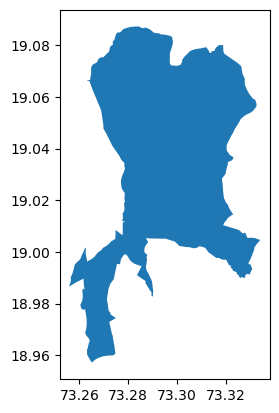

In [1]:
import geopandas as gpd

# Load the full boundary shapefile
mat = gpd.read_file("RANGE_BOUNDARY/RANGE BOUNDARY/Range_Boundary-Alibag_Division.shp")
mat = mat.to_crs(epsg=4326)

# Filter for Matheran Plateau (replace 'NAME' and 'Matheran' with actual column/value)
matheran = mat[mat['MFRNG_NAME'].str.contains('Matheran', case=False)]
matheran.plot()

2. Clip Raster Data to Matheran Plateau

In [5]:
import rasterio
from rasterio.mask import mask

with rasterio.open("Soil_Loss.tif") as src:
    out_image, out_transform = mask(src, matheran.geometry, crop=True)
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

with rasterio.open("Soil_Loss_Matheran.tif", "w", **out_meta) as dest:
    dest.write(out_image)

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

3. Overlay Water Harvesting & Soil Conservation Structures
If you have GPS points or polygons for proposed/field-surveyed structures (e.g., check dams, trenches, etc.), load them as a GeoDataFrame:

In [ ]:
structures = gpd.read_file("structures_matheran.shp")  # Replace with your file
structures = structures.to_crs(epsg=4326)

4. Plot the Detailed Map

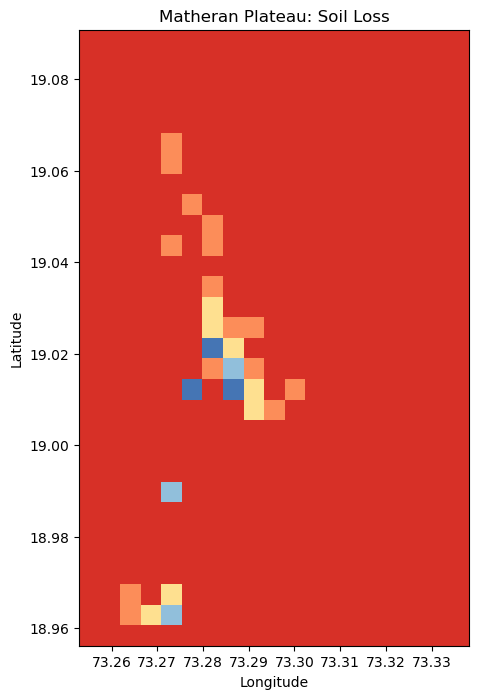

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
matheran.boundary.plot(ax=ax, color='black', linewidth=1.5, label="Matheran Plateau Boundary")

# Load the clipped raster
with rasterio.open("Soil_Loss_Matheran.tif") as src:
    data = src.read(1, masked=True)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define colormap and labels as per your classification
cmap = ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'])
# class_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
class_labels = ["Slight (<10)", "Moderate (10–20)", "High (20–30)", "Very high (30–40)", "Severe (>40)"]
cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(data, cmap=cmap, extent=extent)

# # Plot structures with different symbols/colors by type
# for struct_type, group in structures.groupby('Type'):  # Assuming 'Type' column
#     group.plot(ax=ax, marker='o', label=struct_type, markersize=60, alpha=0.8)

# Add legend for soil loss classes
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[i], label=class_labels[i]) for i in range(len(colors))]
# plt.legend(handles=patches + [plt.Line2D([0], [0], marker='o', color='w', label=t, markerfacecolor='k', markersize=10) for t in structures['Type'].unique()],
#            title="Legend", loc="lower right")

plt.title("Matheran Plateau: Soil Loss")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(extent[0], extent[1])
plt.ylim(extent[2], extent[3])
# plt.savefig("Matheran_SoilLoss_Structures.png", dpi=300, bbox_inches='tight')
plt.show()

✅ NetCDF saved as Soil_Loss.nc


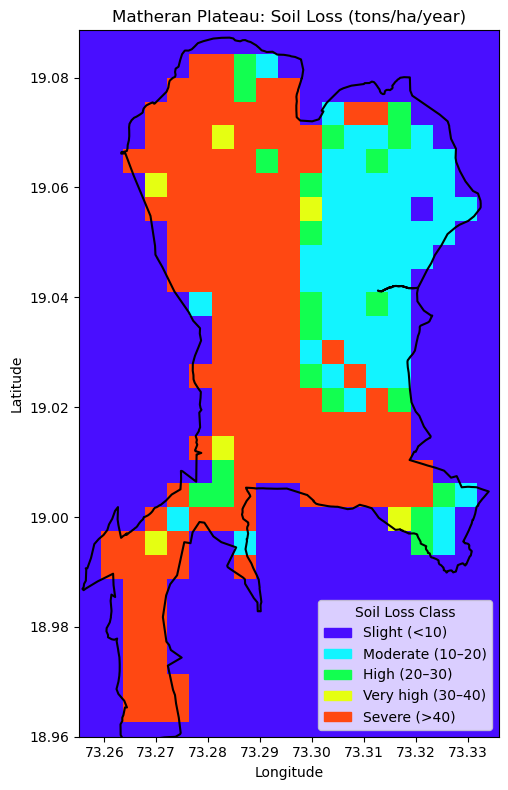

In [7]:
import rasterio
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Read raster using rasterio
tif_file = "Soil_Loss_Matheran.tif"
with rasterio.open(tif_file) as src:
    soil_loss = src.read(1, masked=True)
    transform = src.transform
    crs = src.crs
    width = src.width
    height = src.height

    # Generate coordinates
    lon = np.arange(width) * transform.a + transform.c + transform.a / 2
    lat = np.arange(height) * transform.e + transform.f + transform.e / 2

# Step 2: Create xarray Dataset
ds = xr.Dataset(
    {"soil_loss": (["lat", "lon"], soil_loss)},
    coords={"lat": lat[::-1], "lon": lon},
)
ds["soil_loss"].attrs["units"] = "tons/ha/year"
ds.attrs["crs"] = str(crs)

# Step 3: Save as NetCDF
ds.to_netcdf("Soil_Loss_matheran.nc")
print("✅ NetCDF saved as Soil_Loss.nc")

# Step 4: Classify soil loss values into 5 classes
# bins = [0, 10, 20, 30, 40, np.inf]
bins = [0, 20, 40, 60, 80, np.inf]
labels = [1, 2, 3, 4, 5]
class_names = ["Slight (<10)", "Moderate (10–20)", "High (20–30)", "Very high (30–40)", "Severe (>40)"]
colors = ['#490eff', '#12f4ff', '#12ff50', '#e5ff12', '#ff4812']

# Classify, while ignoring NaNs
soil_loss_vals = ds["soil_loss"].values
classified = np.digitize(soil_loss_vals, bins, right=False)
classified[np.isnan(soil_loss_vals)] = 0  # Use 0 as nodata

# Step 5: Plot classified map
cmap = mcolors.ListedColormap(colors)
bounds = [1, 2, 3, 4, 5, 6]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

masked_classified = np.ma.masked_where(classified == 0, classified)

fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(masked_classified, cmap=cmap, norm=norm, extent=[ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()])
matheran.boundary.plot(ax=ax, color='black', linewidth=1.5, label="Matheran Plateau Boundary")

plt.title("Matheran Plateau: Soil Loss (tons/ha/year)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(handles, class_names, title="Soil Loss Class", loc="lower right")
plt.ylim(18.96, ds.lat.max())
plt.tight_layout()
# plt.savefig("Matheran_SoilLoss_Classification.png", dpi=300, bbox_inches='tight')


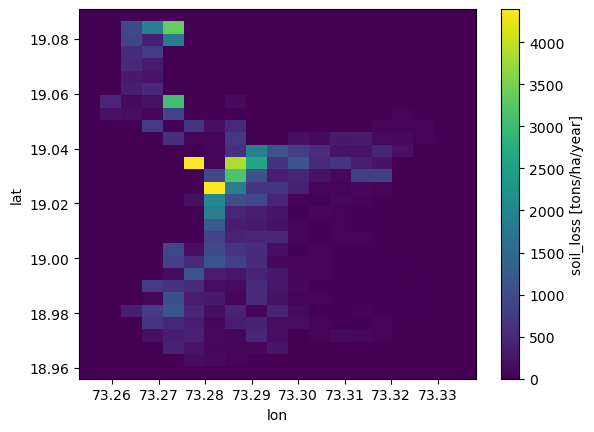

In [37]:
ds["soil_loss"].plot()

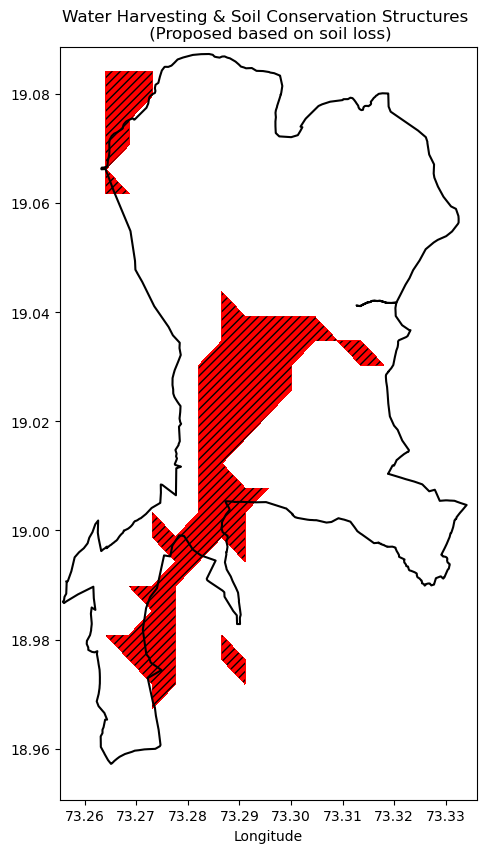

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Mask values <= 500
masked = np.ma.masked_where(ds["soil_loss"].values <= 300, ds["soil_loss"].values)

fig, ax = plt.subplots(figsize=(10, 9))
# Plot only where soil_loss > 1200, with hatching
hatch = '////'
#c = ax.imshow(masked, cmap='Greys', extent=[ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()])
# Overlay hatching using contourf
contour = ax.contourf(
    ds.lon, ds.lat, masked, 
    levels=[300, np.nanmax(masked)], 
    colors='red', 
    hatches=[hatch]
)
matheran.boundary.plot(ax=ax, color='black', linewidth=1.5, label="Matheran Plateau Boundary")

ax.set_title("Water Harvesting & Soil Conservation Structures \n (Proposed based on soil loss)")
ax.set_xlabel("Longitude")
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig("Matheran_Structures.png", dpi=300, bbox_inches='tight')

In [10]:
!conda install conda-forge::contextily

^C


In [18]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins